# 0 IMPORT LIBRARY

In [1]:
# Daa Analysis 
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns

## 0.1 IMPORT FILE CSV

In [2]:
df = pd.read_csv('ds_salaries.csv')

In [3]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [4]:
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


# 1 Exploratory Data Analysis




In [5]:
print(df['experience_level'].nunique(), df['experience_level'].unique(), type(df['experience_level'].unique()))
print(df['company_location'].nunique(), df['company_location'].unique(), type(df['company_location'].unique()))
print(df['employee_residence'].nunique(), df['employee_residence'].unique(), type(df['employee_residence'].unique()))


4 ['SE' 'MI' 'EN' 'EX'] <class 'numpy.ndarray'>
72 ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT'] <class 'numpy.ndarray'>
78 ['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT'] <class 'numpy.ndarray'>


In [6]:
# Employee existence in company location (list comprehension)
print("\nEmployee Residence in Company Location:")
residence_locations = {
    residence: df[df['employee_residence'] == residence]['company_location'].unique().tolist()
    for residence in df['employee_residence'].unique()
}
for residence, locations in residence_locations.items():
    print(f"Employees residing in {residence} work in: {locations}")

# Company location existence of employees (list comprehension)
print("\nCompany Location with Employee Residences:")
location_residences = {
    location: df[df['company_location'] == location]['employee_residence'].unique().tolist()
    for location in df['company_location'].unique()
}
for location, residences in location_residences.items():
    print(f"Company in {location} has employees residing in: {residences}")


Employee Residence in Company Location:
Employees residing in ES work in: ['ES', 'GB', 'US', 'RO']
Employees residing in US work in: ['US', 'AU', 'CR', 'DE', 'CA', 'FR']
Employees residing in CA work in: ['CA', 'AL', 'US']
Employees residing in DE work in: ['DE', 'US', 'AT']
Employees residing in GB work in: ['GB', 'CA']
Employees residing in NG work in: ['NG', 'CA', 'AU']
Employees residing in IN work in: ['IN', 'DE', 'AU', 'SG', 'US', 'AS', 'ID', 'CH']
Employees residing in HK work in: ['HK', 'GB']
Employees residing in PT work in: ['US', 'PT', 'ES', 'LU']
Employees residing in NL work in: ['NL', 'CA', 'DE']
Employees residing in CH work in: ['CH']
Employees residing in CF work in: ['CF']
Employees residing in FR work in: ['FR', 'IN', 'GB', 'DE', 'ES', 'US', 'LU']
Employees residing in AU work in: ['FI', 'PK', 'AU']
Employees residing in FI work in: ['FI']
Employees residing in UA work in: ['UA']
Employees residing in IE work in: ['IE']
Employees residing in IL work in: ['IL']
Emplo

### "Jangan pernah berharap data yang dateng ke temen temen itu bagus"
karena data itu bisa sangat menipu. Keliatannya bagus...
ternyata ada null, ketidak-konsistenan

## 1.1 Check Null Values

In [7]:
# Menampilkan jumlah nilai yang hilang per kolom
print(df.columns)
print(df.isnull().sum())
missing_values_df = pd.DataFrame(df.isnull().sum(), columns=['#_missing_values'])
print(missing_values_df)
# print(df.notnull().sum())

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64
                    #_missing_values
work_year                          0
experience_level                   0
employment_type                    0
job_title                          0
salary                             0
salary_currency                    0
salary_in_usd                      0
employee_residence                 0
remote_ratio                       0
company_location                   0
company_size                       0


## 1.2 Check Duplicate Data
"pasti ada fungsi di pandas yang bisa kita pake itu"

### Copy Data

In [8]:
# Salin data sebelum transformasi
df_copy = df.copy()

In [9]:
df_copy[df_copy.duplicated()]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
115,2023,SE,FT,Data Scientist,150000,USD,150000,US,0,US,M
123,2023,SE,FT,Analytics Engineer,289800,USD,289800,US,0,US,M
153,2023,MI,FT,Data Engineer,100000,USD,100000,US,100,US,M
154,2023,MI,FT,Data Engineer,70000,USD,70000,US,100,US,M
160,2023,SE,FT,Data Engineer,115000,USD,115000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3439,2022,MI,FT,Data Scientist,78000,USD,78000,US,100,US,M
3440,2022,SE,FT,Data Engineer,135000,USD,135000,US,100,US,M
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L


### Delete Duplicate Data

In [10]:
# Menghapus duplikasi
print("Jumlah duplikasi sebelum dihapus", df_copy.duplicated().sum())
df_copy = df_copy.drop_duplicates() # by default semua kolom
# df_copy = df_copy.drop_duplicates(subset=['column_1', ...])
print("Jumlah duplikasi setelah dihapus", df_copy.duplicated().sum())

Jumlah duplikasi sebelum dihapus 1171
Jumlah duplikasi setelah dihapus 0


## 1.3 Check Unique Values in Each Column

### Check Data Shape

In [11]:
df_copy.shape # Ini adalah atribut, bedakan dengan method

(2584, 11)

### Check Data Type

In [12]:
df_copy.dtypes # sekali lagi, ini adalah atribut

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


### Check Data stats

In [14]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [15]:
df_copy.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,2584.000000,2.584000e+03,2584.000000,2584.000000
mean,2022.301084,2.103653e+05,133409.280186,50.483746
std,0.749179,8.080375e+05,67136.837329,48.163707
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,9.000000e+04,84975.000000,0.000000
50%,2022.000000,1.346300e+05,130000.000000,50.000000
75%,2023.000000,1.825625e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


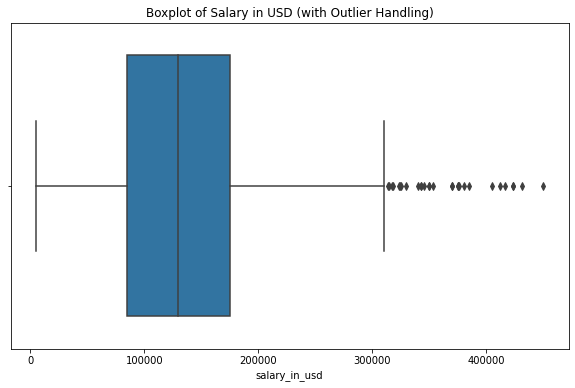

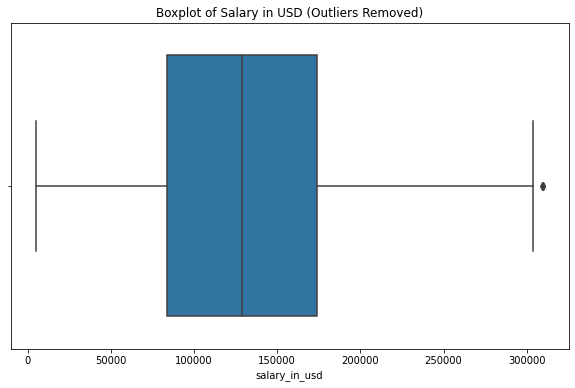

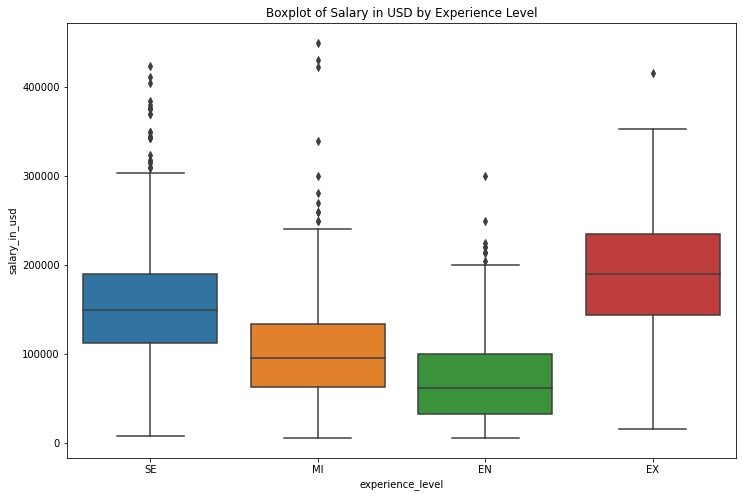

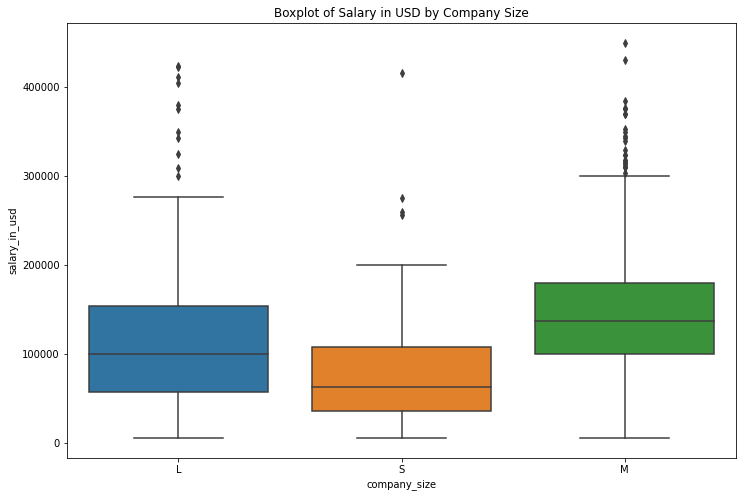

In [16]:
# Boxplot of salary_in_usd with good boundaries
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_copy['salary_in_usd'])
plt.title('Boxplot of Salary in USD (with Outlier Handling)')

# Calculate quartiles and IQR
Q1 = df_copy['salary_in_usd'].quantile(0.25)
Q3 = df_copy['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers for better visualization
filtered_df = df_copy[(df_copy['salary_in_usd'] >= lower_bound) & (df_copy['salary_in_usd'] <= upper_bound)]

# Plot the boxplot with filtered data
plt.figure(figsize=(10, 6))
sns.boxplot(x=filtered_df['salary_in_usd'])
plt.title('Boxplot of Salary in USD (Outliers Removed)')

plt.show()

#Boxplot of salary_in_usd with good boundaries, split by experience level.
plt.figure(figsize=(12, 8))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df_copy)
plt.title('Boxplot of Salary in USD by Experience Level')
plt.show()

#Boxplot of salary_in_usd with good boundaries, split by company size.
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_size', y='salary_in_usd', data=df_copy)
plt.title('Boxplot of Salary in USD by Company Size')
plt.show()

### Check unique values of each Column

In [17]:
non_categorical_columns = ['salary', 'salary_in_usd']
for col in df.columns:
    if col not in non_categorical_columns:
        print(col,':', df_copy[col].nunique())
        print(df_copy[col].unique())
        print("-"*50)
    

work_year : 4
[2023 2022 2020 2021]
--------------------------------------------------
experience_level : 4
['SE' 'MI' 'EN' 'EX']
--------------------------------------------------
employment_type : 4
['FT' 'CT' 'FL' 'PT']
--------------------------------------------------
job_title : 93
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Enginee

## 1.4 Rename Value for Better Understanding

In [18]:
dict_exp_level = {
    'EN': 'Junior', 
    'MI': 'Mid', 
    'SE': 'Senior', 
    'EX': 'Executive'
}

dict_employment_type = {
    'FT': 'Full Time',
    'PT': 'Part Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}

dict_remote_ratio = {
    0: 'No Remote',
    50: 'Partially Remote',
    100: 'Fully Remote'
}

#### Rename values

df_copy['experience_level'] = df_copy['experience_level'].replace(dict_exp_level)
df_copy['employment_type'] = df_copy['employment_type'].replace(dict_employment_type)
df_copy['remote_ratio'] = df_copy['remote_ratio'].replace(dict_remote_ratio)

#### Mapping values

In [19]:
df_copy.insert(
    loc = list(df.columns).index('experience_level')+1,
    column = 'experience_level_desc',
    value = df_copy['experience_level'].map(dict_exp_level)
)
df_copy.insert(
    loc = list(df.columns).index('employment_type')+1,
    column = 'employment_type_desc',
    value = df_copy['employment_type'].map(dict_employment_type)
)
df_copy.insert(
    loc = list(df.columns).index('remote_ratio')+1,
    column = 'remote_ratio_desc',
    value = df_copy['remote_ratio'].map(dict_remote_ratio)
)

In [20]:
df_copy

,work_year,experience_level,experience_level_desc,employment_type_desc,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio_desc,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,Senior,Full Time,FT,Principal Data Scientist,80000,EUR,85847,Fully Remote,ES,100,ES,L
1,2023,MI,Mid,Contract,CT,ML Engineer,30000,USD,30000,Fully Remote,US,100,US,S
2,2023,MI,Mid,Contract,CT,ML Engineer,25500,USD,25500,Fully Remote,US,100,US,S
3,2023,SE,Senior,Full Time,FT,Data Scientist,175000,USD,175000,Fully Remote,CA,100,CA,M
4,2023,SE,Senior,Full Time,FT,Data Scientist,120000,USD,120000,Fully Remote,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,Senior,Full Time,FT,Data Scientist,412000,USD,412000,Fully Remote,US,100,US,L
3751,2021,MI,Mid,Full Time,FT,Principal Data Scientist,151000,USD,151000,Fully Remote,US,100,US,L
3752,2020,EN,Junior,Full Time,FT,Data Scientist,105000,USD,105000,Fully Remote,US,100,US,S
3753,2020,EN,Junior,Contract,CT,Business Data Analyst,100000,USD,100000,Fully Remote,US,100,US,L


## 1.5 Group the Job title

### Check Job Title

In [21]:
df_copy['job_title']

0       Principal Data Scientist
1                    ML Engineer
2                    ML Engineer
3                 Data Scientist
4                 Data Scientist
                  ...           
3750              Data Scientist
3751    Principal Data Scientist
3752              Data Scientist
3753       Business Data Analyst
3754        Data Science Manager
Name: job_title, Length: 2584, dtype: object

### Grouping Function

In [23]:
def assign_broader_category(job_title):
    data_engineering = ["Data Engineer", "Data Analyst", "Analytics Engineer", "BI Data Analyst", "Business Data Analyst", "BI Developer", "BI Analyst", "Business Intelligence Engineer", "BI Data Engineer", "Power BI Developer"]
    data_scientist = ["Data Scientist", "Applied Scientist", "Research Scientist", "3D Computer Vision Researcher", "Deep Learning Researcher", "AI/Computer Vision Engineer"]
    machine_learning = ["Machine Learning Engineer", "ML Engineer", "Lead Machine Learning Engineer", "Principal Machine Learning Engineer"]
    data_architecture = ["Data Architect", "Big Data Architect", "Cloud Data Architect", "Principal Data Architect"]
    management = ["Data Science Manager", "Director of Data Science", "Head of Data Science", "Data Scientist Lead", "Head of Machine Learning", "Manager Data Management", "Data Analytics Manager"]

    if job_title in data_engineering:
        return "Data Engineering"
    elif job_title in data_scientist:
        return "Data Scientist"
    elif job_title in machine_learning:
        return "Machine Learning"
    elif job_title in data_architecture:
        return "Data Architecture"
    elif job_title in management:
        return "Management"
    else:
        return "Other"

In [24]:
df_copy['broader_category'] = df_copy['job_title'].apply(assign_broader_category)

In [27]:
df_copy[df_copy['broader_category']=='Other']

,work_year,experience_level,experience_level_desc,employment_type_desc,employment_type,job_title,salary,salary_currency,salary_in_usd,remote_ratio_desc,employee_residence,remote_ratio,company_location,company_size,broader_category
0,2023,SE,Senior,Full Time,FT,Principal Data Scientist,80000,EUR,85847,Fully Remote,ES,100,ES,L,Other
15,2023,SE,Senior,Full Time,FT,Data Modeler,147100,USD,147100,No Remote,US,0,US,M,Other
16,2023,SE,Senior,Full Time,FT,Data Modeler,90700,USD,90700,No Remote,US,0,US,M,Other
21,2023,SE,Senior,Full Time,FT,Research Engineer,275000,USD,275000,No Remote,DE,0,DE,M,Other
22,2023,SE,Senior,Full Time,FT,Research Engineer,174000,USD,174000,No Remote,DE,0,DE,M,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,2021,MI,Mid,Full Time,FT,Lead Data Analyst,1450000,INR,19609,Fully Remote,IN,100,IN,L,Other
3735,2021,EN,Junior,Part Time,PT,AI Scientist,12000,USD,12000,Fully Remote,BR,100,US,S,Other
3747,2021,MI,Mid,Full Time,FT,Applied Machine Learning Scientist,423000,USD,423000,Partially Remote,US,50,US,L,Other
3749,2021,SE,Senior,Full Time,FT,Data Specialist,165000,USD,165000,Fully Remote,US,100,US,L,Other


## 1.6 Adjust Salary to Present Values

### Inflation Rate

In [ ]:
# Inflation rates
us_inflation_rates = {2019: 0.0181,
                      2020: 0.0123,
                      2021: 0.0470,
                      2022: 0.065}
global_inflation_rates = {2019: 0.0219,
                          2020: 0.0192,
                          2021: 0.0350,
                          2022: 0.088}

def adjust_salary(x):
    year=x['work_year']
    ori_salary=x['salary_in_usd']
    currency=x['salary_currency']

    if year==2023:
        return ori_salary
    else:
        adjust_salary=ori_salary
        for y in range(year,2023):
            if currency=='USD':
                inflation_rate=us_inflation_rates[y]
            else:
                inflation_rate=global_inflation_rates[y]
            adjust_salary=adjust_salary*(1+inflation_rate)
    return adjust_salary

In [ ]:
df_copy['adjusted_salary'] = df_copy.apply(adjust_salary, axis = 1)

# SOAL No.1
Show the median adjusted data scientist salary, for each experience level

## JAWABAN No.1

# SOAL No. 2
Show the number of records for each company_location, sorted descending

## JAWABAN No.2

# SOAL No.3
From this data, show the median adjusted salary of employee who works for company located in Indonesia, do you think that value represents the salary in Indonesia? why? why not?

## JAWABAN No.3

**Kesimpulan** <br>
................